In [1]:
import h5py 
import numpy as np 
import pandas as pd 
import xgboost
from xgboost import XGBRegressor 

import pandas as pd
import numpy as np
from scipy.stats import maxwell
from numpy.random import lognormal, normal

from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error as mse


import pandas as pd
import shap
import sklearn

from sklearn.model_selection import train_test_split

In [2]:
with h5py.File("Downloads/vigna-2021-v4-vqtl-all-utf-v2.h5", "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    keys = list(f.keys())
    vigna = {k: list(f[k]) for k in keys}

Keys: <KeysViewHDF5 ['doy', 'geo_id', 'gr_covar', 'gr_names', 'month', 'response_EM', 'response_R1', 'response_R3', 'response_R5', 'response_R7', 'response_R8', 'species', 'year']>


In [4]:
markers_v4 = pd.read_csv("Downloads/markers_filtered-v4.csv", index_col='Unnamed: 0')
minicore = pd.read_csv("Downloads/minicore_characterization.csv")
minicore["bVI no."] = [bytes(m.replace('\t', ''), 'utf-8') for m in minicore["VI no."]]
idx_minicore = minicore.set_index("bVI no.")

In [5]:
no = []

for s in vigna['species']:
    if s in idx_minicore.index:
        no.append(str(idx_minicore['No.'][s]))
    else:
        no.append(None)
no = np.array(no)
len(no)

1596

In [6]:
X = markers_v4.loc[no[no != None]]
X.index = np.arange(0, 1301)
y = np.array([m[0] for m in vigna["response_R1"]])[no != None]

In [24]:
boo_1 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=6, missing=1, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

boo_2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=10, min_child_weight=6, missing=1, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

boo_3 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=6, missing=1, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


boo_4 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.3, max_delta_step=0,
       max_depth=5, min_child_weight=6, missing=1, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


boo_5 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.03, max_delta_step=0,
       max_depth=5, min_child_weight=6, missing=1, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [32]:
boo_6 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=6, missing=1, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

boo_7 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=10, missing=1, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)



In [25]:
boo_1.fit(X, y)
boo_2.fit(X, y)
boo_3.fit(X, y)
boo_4.fit(X, y)
boo_5.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=6, missing=1,
             monotone_constraints='()', n_estimators=250, n_jobs=1, nthread=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, ...)

In [33]:
boo_6.fit(X, y)
boo_7.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=10, missing=1,
             monotone_constraints='()', n_estimators=250, n_jobs=1, nthread=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, ...)

In [92]:
boo_s = [boo_1, boo_2, boo_3, boo_4, boo_5, boo_6, boo_7]

for boo in boo_s:
    print(np.corrcoef(boo.predict(X), y.astype('float'))[0][1])


0.2945269797292058
0.2930369946274698
0.29444395484857294
0.2945270337799157
0.2937021497493881
0.2945213345521613
0.29449747352864597


In [22]:
np.corrcoef(boo.predict(X), y.astype('float'))[0][1]

0.2945269797292058

In [26]:
X100 = shap.utils.sample(X, 100) 
explainer = shap.Explainer(boo_1.predict, X100)
shap_values_1 = explainer(X, max_evals=550)

Permutation explainer: 1302it [45:11,  2.10s/it]                                                                                                        


In [27]:
X100 = shap.utils.sample(X, 100) 
explainer = shap.Explainer(boo_2.predict, X100)
shap_values_2 = explainer(X, max_evals=550)

Permutation explainer: 1302it [35:23,  1.65s/it]                                                                                                        


In [28]:
X100 = shap.utils.sample(X, 100) 
explainer = shap.Explainer(boo_3.predict, X100)
shap_values_3 = explainer(X, max_evals=550)

Permutation explainer: 1302it [29:36,  1.38s/it]                                                                                                        


In [29]:
X100 = shap.utils.sample(X, 100) 
explainer = shap.Explainer(boo_4.predict, X100)
shap_values_4 = explainer(X, max_evals=550)

Permutation explainer: 1302it [19:05,  1.12it/s]                                                                                                        


In [30]:
X100 = shap.utils.sample(X, 100) 
explainer = shap.Explainer(boo_5.predict, X100)
shap_values_5 = explainer(X, max_evals=550)

Permutation explainer: 1302it [29:31,  1.37s/it]                                                                                                        


In [34]:
X100 = shap.utils.sample(X, 100) 
explainer = shap.Explainer(boo_6.predict, X100)
shap_values_6 = explainer(X, max_evals=550)

Permutation explainer: 1302it [29:44,  1.38s/it]                                                                                                        


In [35]:
X100 = shap.utils.sample(X, 100) 
explainer = shap.Explainer(boo_7.predict, X100)
shap_values_7 = explainer(X, max_evals=550)

Permutation explainer: 1302it [30:27,  1.42s/it]                                                                                                        


In [37]:
shap_values_arr = [shap_values_1, shap_values_2, shap_values_3, shap_values_4
                   , shap_values_5, shap_values_6, shap_values_7]

In [62]:
shap_values_mean_abs = np.mean([np.mean(np.abs(sh.values), axis=0) for sh in shap_values_arr], axis=0)


In [66]:
X.columns[shap_values_mean_abs > 0.17] 

Index(['NC_028351.1_2589691_G_A', 'NC_028351.1_4389407_C_T',
       'NC_028351.1_7158567_A_G', 'NC_028351.1_7158573_G_T',
       'NC_028351.1_10609109_T_C', 'NC_028351.1_10692107_C_G',
       'NC_028351.1_22007106_G_C', 'NC_028351.1_27159258_A_G',
       'NC_028351.1_34854418_G_A', 'NC_028352.1_4467878_A_G',
       'NC_028352.1_4467885_T_C', 'NC_028352.1_10450882_A_T',
       'NC_028352.1_10968089_C_G', 'NC_028352.1_11005246_G_A',
       'NC_028352.1_18243086_C_A', 'NC_028352.1_21084823_T_C',
       'NC_028353.1_9110081_A_C', 'NC_028353.1_9642796_C_T',
       'NC_028353.1_10441671_G_A', 'NC_028354.1_5069290_T_A',
       'NC_028354.1_20359715_C_T', 'NC_028355.1_8913587_T_A',
       'NC_028355.1_25788220_T_G', 'NC_028355.1_32044197_G_C',
       'NC_028356.1_25365321_T_G', 'NC_028356.1_30896900_T_C',
       'NC_028356.1_36782201_T_C', 'NC_028357.1_6504327_G_T',
       'NC_028357.1_30063199_C_A', 'NC_028357.1_33876662_A_G',
       'NC_028357.1_35091432_A_T', 'NC_028357.1_36154036_G_T',
   

In [120]:
shap_values_1

.values =
array([[ 2.73056412e-02, -1.76752090e-03,  1.43896542e-01, ...,
         2.32883739e-01, -2.72222328e-02,  6.98318481e-04],
       [ 4.12411499e-02, -3.37993984e-01,  1.83646946e-01, ...,
         5.87170792e-02, -4.31627922e-01,  1.54262543e-03],
       [ 3.16919594e-01,  4.53317471e-01,  8.59943962e-02, ...,
         5.98228836e-02,  8.21045876e-02,  4.83619690e-03],
       ...,
       [ 2.94657898e-01,  1.08265688e+00,  1.69435692e-01, ...,
         5.65460587e-02,  4.09481087e-01,  1.23428345e-03],
       [ 4.42533875e-02, -3.02314377e-02,  4.14009972e-01, ...,
        -1.03838730e-02,  1.06654320e-01,  1.67617798e-03],
       [-1.65725212e-01, -5.62119675e-02,  1.75084305e-01, ...,
         8.26245499e-02, -7.38941193e-03, -3.68388557e-02]])

.base_values =
array([72.22062717, 72.22062717, 72.22062717, ..., 72.22062717,
       72.22062717, 72.22062717])

.data =
array([[1, 0, 1, ..., 1, 1, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 0, 0],
       ...,
  

In [132]:
import h5py, numpy as np
 # each arrX is a numpy array
def get_dict(shap):
    return {"values" : shap.values, "base_values" : shap.base_values, "data" : shap.data}
    
for i in range(1, 8):
    with h5py.File('shapley_data_' + str(i) + '.h5', 'w', libver='latest') as f:  # use 'latest' for performance
        for key, arr in get_dict(eval('shap_values_' + str(i))).items():
            dset = f.create_dataset(str(key), shape=arr.shape, data=arr, chunks=arr.shape,
                                compression='gzip', compression_opts=9)

In [133]:
boo_1.save_model('shap_model_1.json')
boo_2.save_model('shap_model_2.json')
boo_3.save_model('shap_model_3.json')
boo_4.save_model('shap_model_4.json')
boo_5.save_model('shap_model_5.json')
boo_6.save_model('shap_model_6.json')
boo_7.save_model('shap_model_7.json')

[72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,
 72.22062717437744,


In [87]:
sorted(shap_values_mean_abs)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0019321146406142552,
 0.002263474469128855,
 0.0030553873312830757,
 0.003055551578567363,
 0.004038220894929682,
 0.005025689820498744,
 0.0057007914352877635,
 0.007637389130580339,
 0.008530848186757187,
 0.011672732592074075,
 0.015993807951731498,
 0.017850045281340342,
 0.019263304565562068,
 0.020277979836003702,
 0.020429498193501417,
 0.020556599842254625,
 0.020938774130668244,
 0.02177240394846962,
 0.022228059183298586,
 0.022462518310211847,
 0.022572431825080952,
 0.022935330910440196,
 0.0237065007048616,
 0.024213575970737727,
 0.0252470158310665,
 0.025537018902126115,
 0.025943001181335572,
 0.02787138476256047,
 0.02838946597144435,
 0.02891407514542613,
 0.029419227339138376,
 0.030129607476975583,
 0.03152761692245254,
 0.03436070917309004,
 0.034694733546910383,
 0.035254154238832276,
 0.03565512587527513,
 0.036876073584698486,
 0.03768751999543091,
 0.0

<StemContainer object of 3 artists>

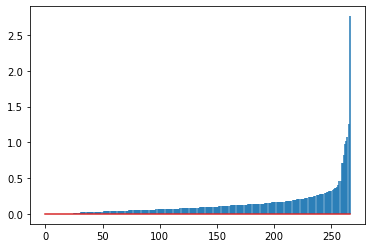

In [86]:
plt.stem(sorted(shap_values_mean_abs), markerfmt=' ')

In [111]:
np.mean(boo_1.predict(shap_values_1.data))

72.891624

In [108]:
np.sum(shap_values_1.values, axis=1) + shap_values_1.base_values

array([ 79.99988556,  77.19960785,  78.24996948, ..., 129.25163269,
        68.16668701,  44.60057068])

In [109]:
np.mean(boo_1.predict(X))

72.891624

In [110]:
shap_values_1.base_values

array([72.22062717, 72.22062717, 72.22062717, ..., 72.22062717,
       72.22062717, 72.22062717])

In [96]:
import re
for x in X.columns[shap_values_mean_abs > 0.25]:
    print(re.sub(r'_', r'\_', x) + '\\\\')

NC\_028351.1\_10609109\_T\_C\\
NC\_028351.1\_27159258\_A\_G\\
NC\_028352.1\_4467878\_A\_G\\
NC\_028352.1\_10450882\_A\_T\\
NC\_028352.1\_10968089\_C\_G\\
NC\_028352.1\_21084823\_T\_C\\
NC\_028353.1\_9110081\_A\_C\\
NC\_028353.1\_10441671\_G\_A\\
NC\_028354.1\_20359715\_C\_T\\
NC\_028355.1\_25788220\_T\_G\\
NC\_028355.1\_32044197\_G\_C\\
NC\_028356.1\_25365321\_T\_G\\
NC\_028356.1\_30896900\_T\_C\\
NC\_028356.1\_36782201\_T\_C\\
NC\_028357.1\_6504327\_G\_T\\
NC\_028357.1\_36154036\_G\_T\\
NC\_028357.1\_47275363\_T\_A\\
NC\_028357.1\_49496074\_C\_T\\
NC\_028357.1\_51263619\_T\_A\\
NC\_028358.1\_22076567\_G\_A\\
NC\_028358.1\_31436226\_G\_A\\
NC\_028359.1\_1123957\_C\_T\\
NC\_028359.1\_2263073\_T\_C\\
NC\_028359.1\_11508209\_C\_T\\
NC\_028360.1\_18925782\_T\_C\\
NC\_028361.1\_6343387\_T\_C\\
NC\_028361.1\_11103727\_G\_A\\
NW\_014542552.1\_437170\_C\_A\\
NW\_014543262.1\_740995\_G\_A\\
NW\_014543262.1\_1621171\_G\_T\\


In [69]:
#np.where(X.columns == 'NC_028356.1_18228698_C_T')
X.columns[125]

'NC_028356.1_18228698_C_T'

In [73]:
shap_values_mean_abs[125]

0.06146985399274067

In [82]:
shap_values_1.values.shape

(1301, 267)

0.7871647507803777

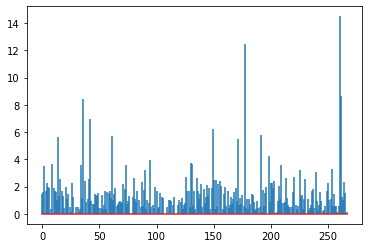

In [81]:
shap_values_max_abs = np.mean([np.max(np.abs(sh.values), axis=0) for sh in shap_values_arr], axis=0)

plt.stem(shap_values_max_abs, markerfmt=' ')

shap_values_max_abs[125]

<StemContainer object of 3 artists>

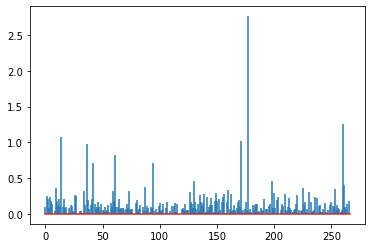

In [48]:
plt.stem(shap_values_mean_abs, markerfmt=' ')

In [ ]:
12345 305498 7048017 11694653 1565158 2591019 9471233 570265 13137658 1325095 
12345 305498 7048017 11694653 1565158 2591019 9471233 570265 13137658 1325095 
12345 305498 7048017 1565158 1565158 2591019 570265 570265 1325095 
12345 305498 1565158 1565158 570265 570265 570265 
12345 305498 570265 

In [11]:
shap_frame = pd.DataFrame(shap_values.values, columns = X.columns)

In [12]:
max_shap = np.max(np.abs(shap_frame), axis=0) 
mean_shap = np.mean(np.abs(shap_frame), axis=0)
std_shap = np.std(np.abs(shap_frame), axis=0)

<StemContainer object of 3 artists>

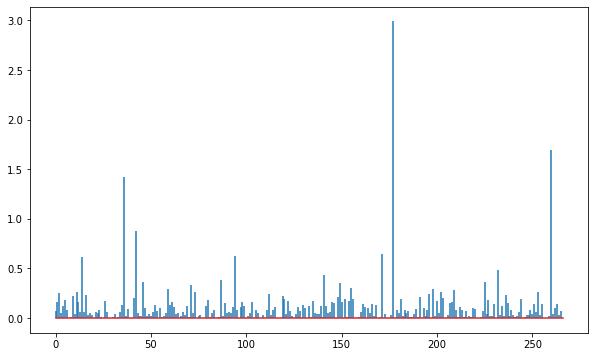

In [16]:
plt.figure(figsize=(10, 6))
plt.stem(mean_shap
         , markerfmt=' ')


In [24]:
values = mean_shap.sort_values(ascending=False)[:20]
values.index

Index(['NC_028358.1_31436226_G_A', 'NW_014543262.1_740995_G_A',
       'NC_028352.1_10968089_C_G', 'NC_028352.1_21084823_T_C',
       'NC_028358.1_22076567_G_A', 'NC_028355.1_32044197_G_C',
       'NC_028351.1_27159258_A_G', 'NC_028361.1_11194272_A_T',
       'NC_028357.1_30063199_C_A', 'NC_028355.1_25788220_T_G',
       'NC_028361.1_6343387_T_C', 'NC_028353.1_1731200_T_A',
       'NC_028357.1_36154036_G_T', 'NC_028354.1_19007443_T_C',
       'NC_028357.1_46929244_A_C', 'NC_028359.1_1123957_C_T',
       'NC_028353.1_9110081_A_C', 'NC_028359.1_11508209_C_T',
       'NC_028359.1_4623648_A_C', 'NW_014542552.1_437170_C_A'],
      dtype='object')

In [29]:
values

NC_028358.1_31436226_G_A     2.989723
NW_014543262.1_740995_G_A    1.697317
NC_028352.1_10968089_C_G     1.420306
NC_028352.1_21084823_T_C     0.879975
NC_028358.1_22076567_G_A     0.644316
NC_028355.1_32044197_G_C     0.620351
NC_028351.1_27159258_A_G     0.610517
NC_028361.1_11194272_A_T     0.483166
NC_028357.1_30063199_C_A     0.430045
NC_028355.1_25788220_T_G     0.385349
NC_028361.1_6343387_T_C      0.366598
NC_028353.1_1731200_T_A      0.363398
NC_028357.1_36154036_G_T     0.352963
NC_028354.1_19007443_T_C     0.336607
NC_028357.1_46929244_A_C     0.300260
NC_028359.1_1123957_C_T      0.296346
NC_028353.1_9110081_A_C      0.288045
NC_028359.1_11508209_C_T     0.278420
NC_028359.1_4623648_A_C      0.263645
NW_014542552.1_437170_C_A    0.259990
dtype: float64

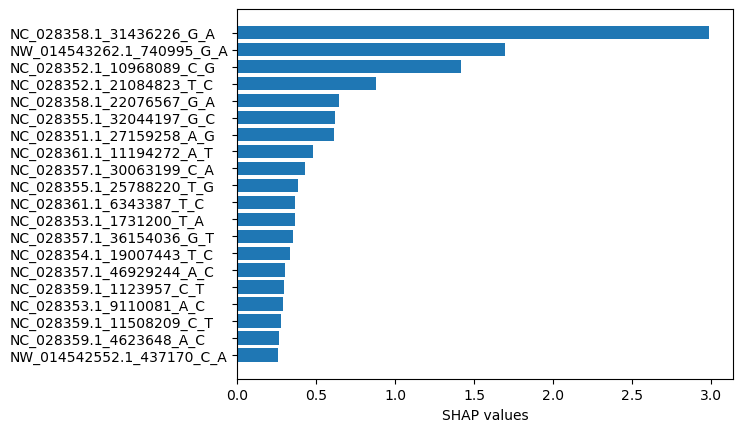

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = values.index
y_pos = np.arange(len(people))
performance = values

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people, ha='left')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('SHAP values')
#ax.set_title('How fast do you want to go today?')
yax = ax.get_yaxis()
yax.set_tick_params(pad=160)

plt.show()

In [128]:
snps =  ['NC_028358.1_31436226_G_A'
               , 'NC_028358.1_31415131_C_T'
               , 'NC_028358.1_31321418_G_C'
               , 'NC_028356.1_18228698_C_T'
               , 'NC_028354.1_20359715_C_T'
               , 'NC_028358.1_4599500_T_C'
               , 'NW_014542552.1_437170_C_A'
               , 'NC_028355.1_35044368_C_T'
               , 'NC_028355.1_34942800_A_T']

bool_ = np.array([c in snps for c in markers_v4.columns])

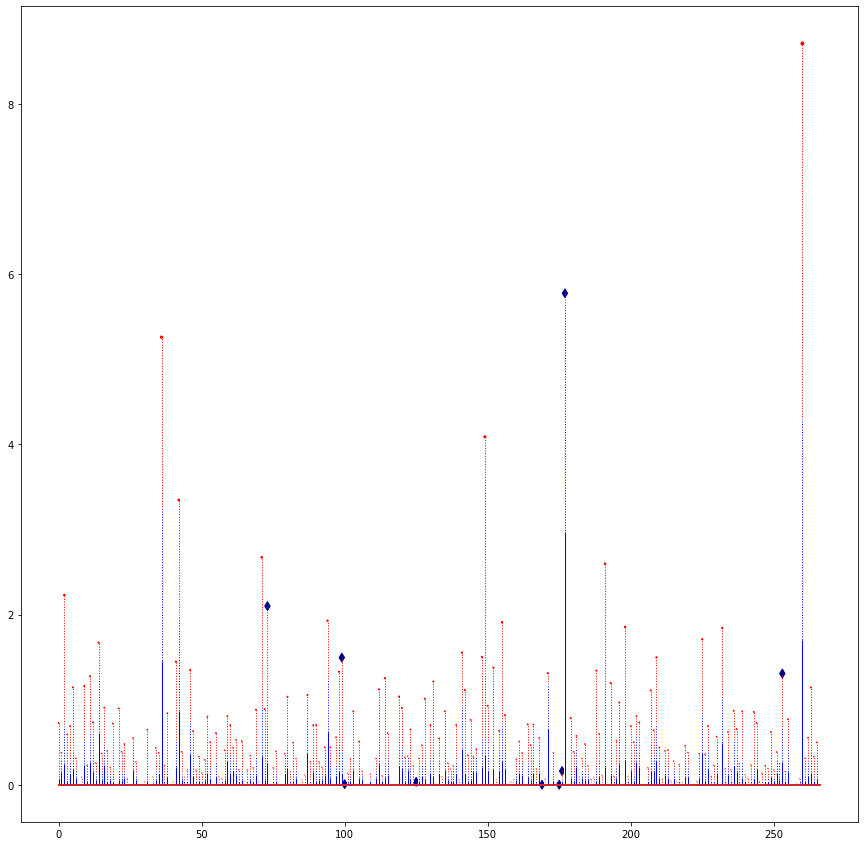

In [140]:
plt.figure(figsize = (15, 15))
_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap)), max_shap / 2.5, linefmt=':', markerfmt=' ')
plt.setp(stemlines, color='red', linewidth=1, zorder=2)

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap)), mean_shap + std_shap, markerfmt=' ')
plt.setp(stemlines, color='white', linewidth=2, zorder=2)

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap)), mean_shap
         , markerfmt=' ')

plt.setp(stemlines, color='blue', linewidth=1, zorder=2)

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap)), mean_shap + std_shap, markerfmt=' ', linefmt=':')
plt.setp(stemlines, color='blue', linewidth=1, zorder=2)

plt.scatter(np.arange(0, len(max_shap)), max_shap / 2.5, s=max_shap / 2.5, color='red', zorder=1)


plt.scatter(np.arange(0, len(max_shap)) 
            , max_shap / 2.5 * bool_ 
            , s= [40 if c in snps else 0 for c in markers_v4.columns]
            , color='darkblue', zorder=1, marker="d")

boo = XGBRegressor(
    base_score=0.5
    , booster='gbtree'
    , colsample_bylevel=1
    , colsample_bynode=1
    , colsample_bytree=1
    , gamma=0
    , importance_type='gain'
    , learning_rate= min(1, lognormal(mean=-3, sigma=1.5))
    , max_delta_step=0
    , max_depth= int(max(3, normal(10, 5)))
    , min_child_weight=int(max(1, normal(4, 3)))
    , missing=1
    , n_estimators=int(max(20, normal(100, 50)))
    , n_jobs=1
    , nthread=None
    , objective='reg:squarederror'
    , random_state=0
    , reg_alpha=0
    , reg_lambda=1
    , scale_pos_weight=1
    , seed=None
    , silent=None
    , subsample=1
    , verbosity=1)

boo.fit(X, y)

X100 = shap.utils.sample(X, 100) 
explainer_1 = shap.Explainer(boo.predict, X100)
shap_values_1 = explainer_1(X, max_evals=550)

In [150]:
shap_frame_1 = pd.DataFrame(shap_values_1.values, columns = X.columns)
max_shap_1 = np.max(np.abs(shap_frame_1), axis=0) 
mean_shap_1 = np.mean(np.abs(shap_frame_1), axis=0)
std_shap_1 = np.std(np.abs(shap_frame_1), axis=0)

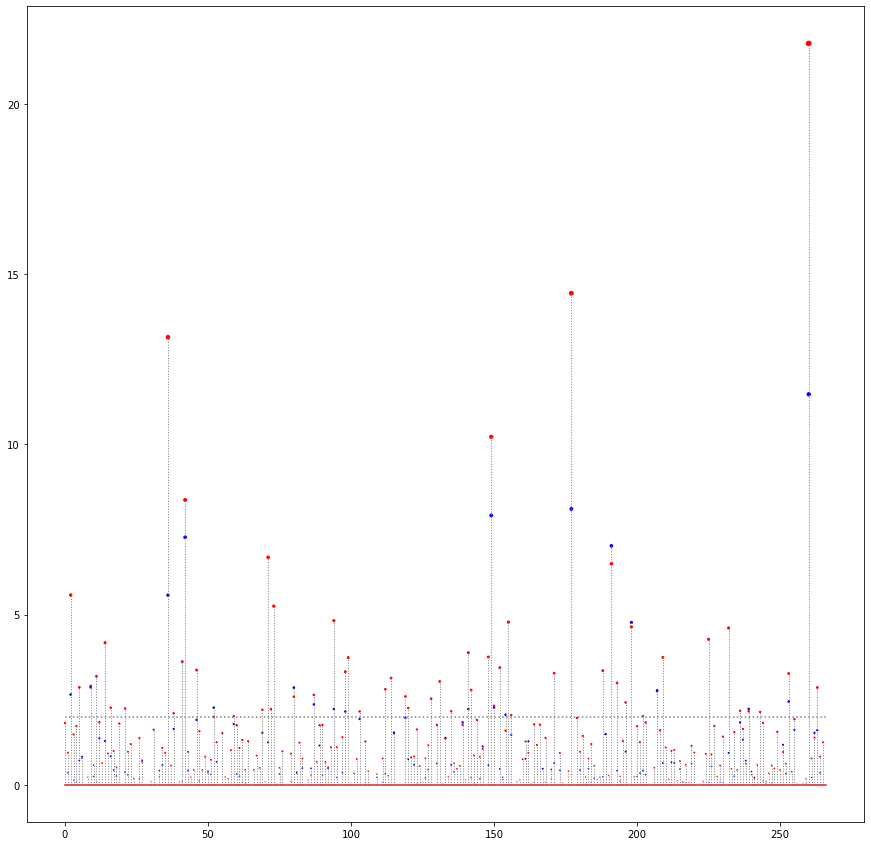

In [158]:



plt.figure(figsize = (15, 15))

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap))
                                  , np.max([max_shap_1, max_shap], axis=0)
                                  , linefmt=':', markerfmt=' ')
plt.setp(stemlines, color='gray', linewidth=1, zorder=2)


plt.scatter(np.arange(0, len(max_shap)), max_shap, s=max_shap, color='red', zorder=1)

plt.scatter(np.arange(0, len(max_shap)), max_shap_1, s=max_shap_1, color='blue', zorder=1)

plt.plot([0, len(max_shap) - 1], [2, 2], color='grey', linestyle= ':')

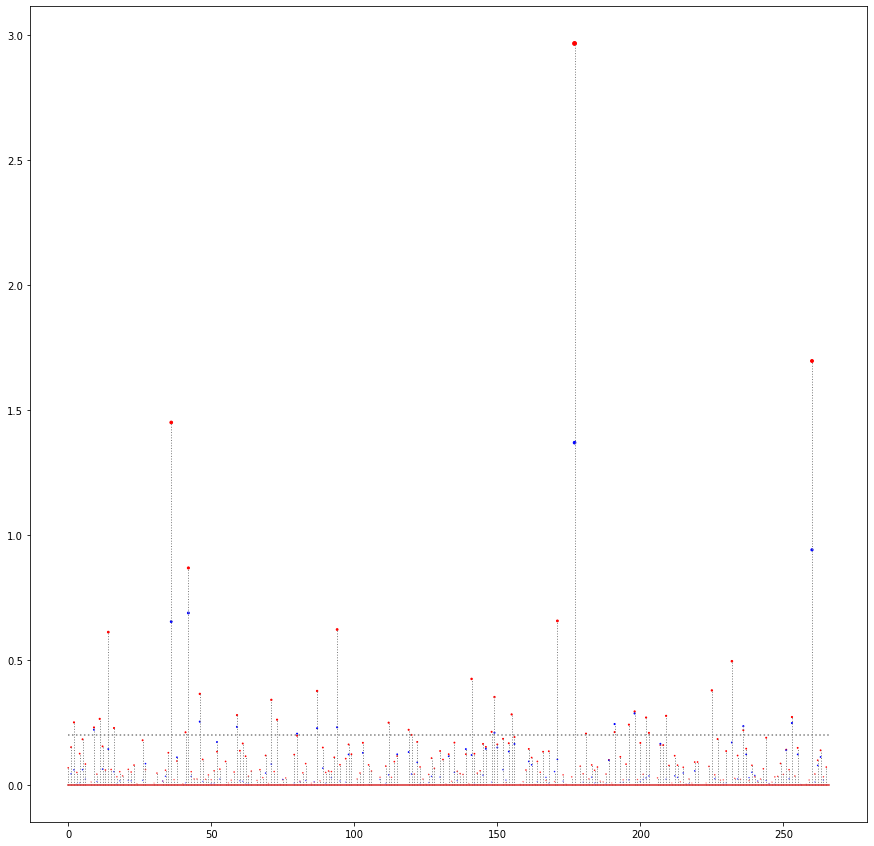

In [162]:
plt.figure(figsize = (15, 15))

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap))
                                  , np.max([mean_shap_1, mean_shap], axis=0)
                                  , linefmt=':', markerfmt=' ')
plt.setp(stemlines, color='gray', linewidth=1, zorder=2)


plt.scatter(np.arange(0, len(max_shap)), mean_shap, s=mean_shap * 5, color='red', zorder=1)

plt.scatter(np.arange(0, len(max_shap)), mean_shap_1, s=mean_shap_1 * 5, color='blue', zorder=1)

plt.plot([0, len(max_shap) - 1], [0.2, 0.2], color='grey', linestyle= ':')

In [209]:
where = np.where(
np.logical_or(np.max([mean_shap_1, mean_shap], axis=0) > 0.2, np.max([max_shap_1, max_shap], axis=0) > 2)
)

In [32]:
mean_shap

NC_028351.1_1130369_G_T       0.066313
NC_028351.1_2589691_G_A       0.158595
NC_028351.1_4389407_C_T       0.256007
NC_028351.1_6653772_G_A       0.051680
NC_028351.1_7158567_A_G       0.123240
                                ...   
NW_014543262.1_1622812_T_C    0.096075
NW_014543415.1_249763_A_G     0.136387
NW_014543415.1_372624_C_T     0.031705
NW_014543432.1_144127_G_A     0.067916
NW_014543808.1_360373_G_C     0.000000
Length: 267, dtype: float64

In [43]:
import re
for s in mean_shap[np.where(mean_shap > 0.3)[0]].index:
    print(re.sub('_', '\_', s))

NC\_028351.1\_27159258\_A\_G
NC\_028352.1\_10968089\_C\_G
NC\_028352.1\_21084823\_T\_C
NC\_028353.1\_1731200\_T\_A
NC\_028354.1\_19007443\_T\_C
NC\_028355.1\_25788220\_T\_G
NC\_028355.1\_32044197\_G\_C
NC\_028357.1\_30063199\_C\_A
NC\_028357.1\_36154036\_G\_T
NC\_028357.1\_46929244\_A\_C
NC\_028358.1\_22076567\_G\_A
NC\_028358.1\_31436226\_G\_A
NC\_028361.1\_6343387\_T\_C
NC\_028361.1\_11194272\_A\_T
NW\_014543262.1\_740995\_G\_A


In [42]:
import re
print(re.sub('_', '\_', 'Na_ss'))

Na\_ss


In [210]:
found_snps = X.columns[where]
len(found_snps)

60

In [211]:
given_snps = ["NC_028351.1_10609109_T_C", "NC_028352.1_1756685_A_T",
"NC_028353.1_4083774_A_T", "NC_028353.1_7715763_T_C",
"NC_028354.1_19007443_T_C", "NC_028354.1_19193706_A_T",
"NC_028356.1_5599756_C_A", "NC_028356.1_18228698_C_T",
"NC_028357.1_36154036_G_T", "NC_028357.1_51548743_T_C",
"NC_028358.1_42385899_G_T", "NC_028358.1_43289540_T_C",
"NC_028358.1_43289553_G_A", "NC_028361.1_10688905_A_C",
"NW_014541837.1_1074368_C_T"]

In [212]:
set(given_snps).intersection(set(found_snps))

{'NC_028351.1_10609109_T_C',
 'NC_028354.1_19007443_T_C',
 'NC_028354.1_19193706_A_T',
 'NC_028356.1_5599756_C_A',
 'NC_028357.1_36154036_G_T',
 'NC_028358.1_42385899_G_T',
 'NC_028358.1_43289540_T_C',
 'NW_014541837.1_1074368_C_T'}

In [213]:
len(given_snps)

15

boo = XGBRegressor(
    base_score=0.5
    , booster='gbtree'
    , colsample_bylevel=1
    , colsample_bynode=1
    , colsample_bytree=1
    , gamma=0
    , importance_type='gain'
    , learning_rate= min(1, lognormal(mean=-3, sigma=1.5))
    , max_delta_step=0
    , max_depth= int(max(3, normal(10, 5)))
    , min_child_weight=int(max(1, normal(4, 3)))
    , missing=1
    , n_estimators=int(max(20, normal(100, 50)))
    , n_jobs=1
    , nthread=None
    , objective='reg:squarederror'
    , random_state=0
    , reg_alpha=0
    , reg_lambda=1
    , scale_pos_weight=1
    , seed=None
    , silent=None
    , subsample=1
    , verbosity=1)

boo.fit(X, y)

X100 = shap.utils.sample(X, 100) 
explainer_2 = shap.Explainer(boo.predict, X100)
shap_values_2 = explainer_2(X, max_evals=550)

boo = XGBRegressor(
    base_score=0.5
    , booster='gbtree'
    , colsample_bylevel=1
    , colsample_bynode=1
    , colsample_bytree=1
    , gamma=0
    , importance_type='gain'
    , learning_rate= min(1, lognormal(mean=-3, sigma=1.5))
    , max_delta_step=0
    , max_depth= int(max(3, normal(10, 5)))
    , min_child_weight=int(max(1, normal(4, 3)))
    , missing=1
    , n_estimators=int(max(20, normal(100, 50)))
    , n_jobs=1
    , nthread=None
    , objective='reg:squarederror'
    , random_state=0
    , reg_alpha=0
    , reg_lambda=1
    , scale_pos_weight=1
    , seed=None
    , silent=None
    , subsample=1
    , verbosity=1)

boo.fit(X, y)

X100 = shap.utils.sample(X, 100) 
explainer_3 = shap.Explainer(boo.predict, X100)
shap_values_3 = explainer_3(X, max_evals=550)

boo = XGBRegressor(
    base_score=0.5
    , booster='gbtree'
    , colsample_bylevel=1
    , colsample_bynode=1
    , colsample_bytree=1
    , gamma=0
    , importance_type='gain'
    , learning_rate= min(1, lognormal(mean=-3, sigma=1.5))
    , max_delta_step=0
    , max_depth= int(max(3, normal(10, 5)))
    , min_child_weight=int(max(1, normal(4, 3)))
    , missing=1
    , n_estimators=int(max(20, normal(200, 50)))
    , n_jobs=1
    , nthread=None
    , objective='reg:squarederror'
    , random_state=0
    , reg_alpha=0
    , reg_lambda=1
    , scale_pos_weight=1
    , seed=None
    , silent=None
    , subsample=1
    , verbosity=1)

boo.fit(X, y)

X100 = shap.utils.sample(X, 100) 
explainer_4 = shap.Explainer(boo.predict, X100)
shap_values_4 = explainer_4(X, max_evals=550)

In [217]:
shap_frame_2 = pd.DataFrame(shap_values_2.values, columns = X.columns)
max_shap_2 = np.max(np.abs(shap_frame_2), axis=0) 
mean_shap_2 = np.mean(np.abs(shap_frame_2), axis=0)
std_shap_2 = np.std(np.abs(shap_frame_2), axis=0)

In [218]:
shap_frame_3 = pd.DataFrame(shap_values_3.values, columns = X.columns)
max_shap_3 = np.max(np.abs(shap_frame_3), axis=0) 
mean_shap_3 = np.mean(np.abs(shap_frame_3), axis=0)
std_shap_3 = np.std(np.abs(shap_frame_3), axis=0)

In [219]:
shap_frame_4 = pd.DataFrame(shap_values_4.values, columns = X.columns)
max_shap_4 = np.max(np.abs(shap_frame_4), axis=0) 
mean_shap_4 = np.mean(np.abs(shap_frame_4), axis=0)
std_shap_4 = np.std(np.abs(shap_frame_4), axis=0)

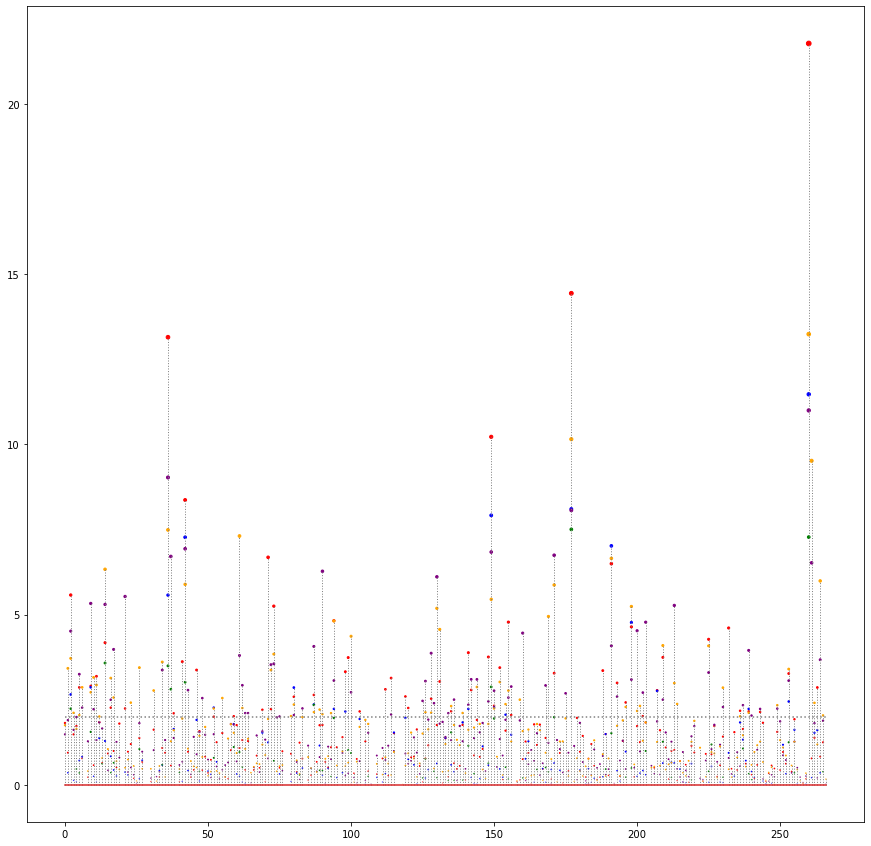

In [225]:
plt.figure(figsize = (15, 15))

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap))
                                  , np.max([max_shap_1, max_shap, max_shap_2, max_shap_3, max_shap_4], axis=0)
                                  , linefmt=':', markerfmt=' ')
plt.setp(stemlines, color='gray', linewidth=1, zorder=2)


plt.scatter(np.arange(0, len(max_shap)), max_shap, s=max_shap, color='red', zorder=1)

plt.scatter(np.arange(0, len(max_shap)), max_shap_1, s=max_shap_1, color='blue', zorder=1)

plt.scatter(np.arange(0, len(max_shap)), max_shap_2, s=max_shap_2, color='green', zorder=1)
plt.scatter(np.arange(0, len(max_shap)), max_shap_3, s=max_shap_3, color='purple', zorder=1)
plt.scatter(np.arange(0, len(max_shap)), max_shap_4, s=max_shap_4, color='orange', zorder=1)

plt.plot([0, len(max_shap) - 1], [2, 2], color='grey', linestyle= ':')

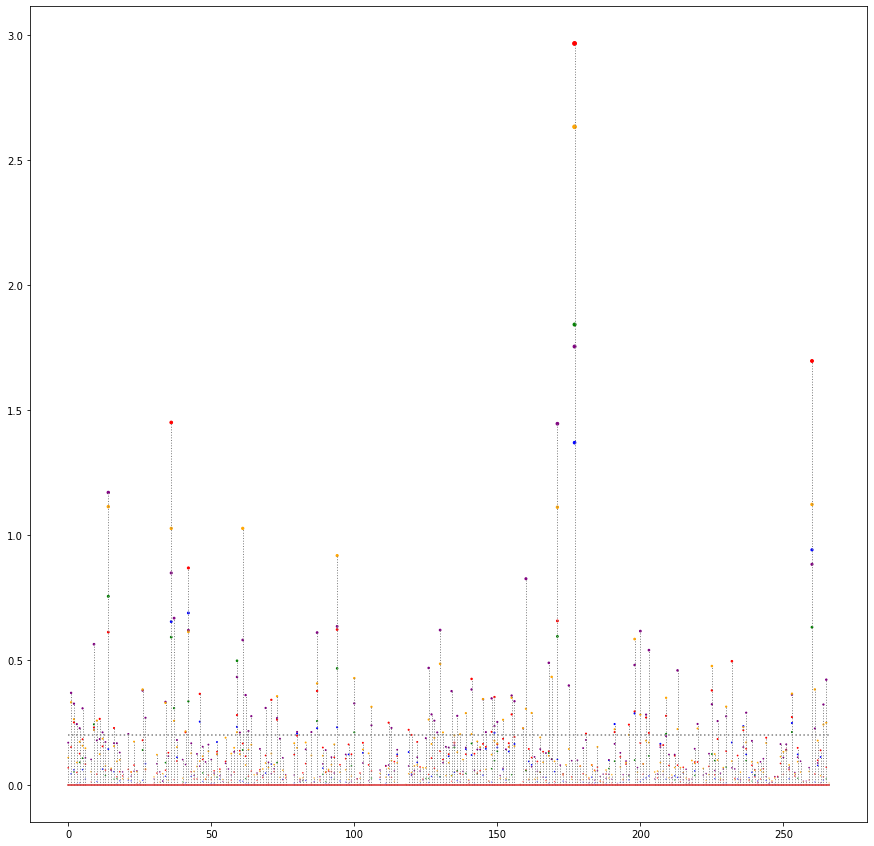

In [227]:
plt.figure(figsize = (15, 15))

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap))
                                  , np.max([mean_shap_1, mean_shap, mean_shap_2, mean_shap_3, mean_shap_4], axis=0)
                                  , linefmt=':', markerfmt=' ')
plt.setp(stemlines, color='gray', linewidth=1, zorder=2)


plt.scatter(np.arange(0, len(max_shap)), mean_shap, s=mean_shap * 5, color='red', zorder=1)

plt.scatter(np.arange(0, len(max_shap)), mean_shap_1, s=mean_shap_1 * 5, color='blue', zorder=1)

plt.scatter(np.arange(0, len(max_shap)), mean_shap_2, s=mean_shap_2 * 5, color='green', zorder=1)
plt.scatter(np.arange(0, len(max_shap)), mean_shap_3, s=mean_shap_3 * 5, color='purple', zorder=1)
plt.scatter(np.arange(0, len(max_shap)), mean_shap_4, s=mean_shap_4 * 5, color='orange', zorder=1)

plt.plot([0, len(max_shap) - 1], [0.2, 0.2], color='grey', linestyle= ':')

In [228]:
where = np.where(
np.logical_or(np.max([mean_shap_1, mean_shap, mean_shap_2, mean_shap_3, mean_shap_4], axis=0) > 0.2
              , np.max([max_shap_1, max_shap, max_shap_2, max_shap_3, max_shap_4], axis=0) > 2)
)

In [229]:
found_snps = X.columns[where]
len(found_snps)

123

In [ ]:
!pip install colorama

In [232]:
set(given_snps).intersection(set(found_snps))

{'NC_028351.1_10609109_T_C',
 'NC_028353.1_4083774_A_T',
 'NC_028354.1_19007443_T_C',
 'NC_028354.1_19193706_A_T',
 'NC_028356.1_18228698_C_T',
 'NC_028356.1_5599756_C_A',
 'NC_028357.1_36154036_G_T',
 'NC_028358.1_42385899_G_T',
 'NC_028358.1_43289540_T_C',
 'NW_014541837.1_1074368_C_T'}

In [256]:
where = np.where(
np.logical_or(np.mean([mean_shap_1, mean_shap, mean_shap_2, mean_shap_3, mean_shap_4], axis=0) > 0.2
              , np.mean([max_shap_1, max_shap, max_shap_2, max_shap_3, max_shap_4], axis=0) > 2)
)

In [257]:
found_snps = X.columns[where]
found_snps

Index(['NC_028351.1_4389407_C_T', 'NC_028351.1_10609109_T_C',
       'NC_028351.1_27159258_A_G', 'NC_028352.1_4467878_A_G',
       'NC_028352.1_10968089_C_G', 'NC_028352.1_11005246_G_A',
       'NC_028352.1_21084823_T_C', 'NC_028353.1_9110081_A_C',
       'NC_028353.1_10441671_G_A', 'NC_028354.1_19007443_T_C',
       'NC_028354.1_20359715_C_T', 'NC_028355.1_25788220_T_G',
       'NC_028355.1_27392460_T_A', 'NC_028355.1_32044197_G_C',
       'NC_028356.1_30896900_T_C', 'NC_028357.1_30063199_C_A',
       'NC_028357.1_36154036_G_T', 'NC_028357.1_38048121_C_G',
       'NC_028357.1_46929244_A_C', 'NC_028357.1_49496074_C_T',
       'NC_028358.1_22076567_G_A', 'NC_028358.1_31436226_G_A',
       'NC_028358.1_43289540_T_C', 'NC_028359.1_1123957_C_T',
       'NC_028359.1_2263073_T_C', 'NC_028359.1_7726115_T_A',
       'NC_028359.1_11508209_C_T', 'NC_028361.1_6343387_T_C',
       'NW_014541837.1_1074368_C_T', 'NW_014542552.1_437170_C_A',
       'NW_014543262.1_740995_G_A', 'NW_014543262.1_1621171

In [238]:
set(given_snps).intersection(set(found_snps))

{'NC_028351.1_10609109_T_C',
 'NC_028354.1_19007443_T_C',
 'NC_028354.1_19193706_A_T',
 'NC_028357.1_36154036_G_T',
 'NC_028358.1_43289540_T_C',
 'NW_014541837.1_1074368_C_T'}

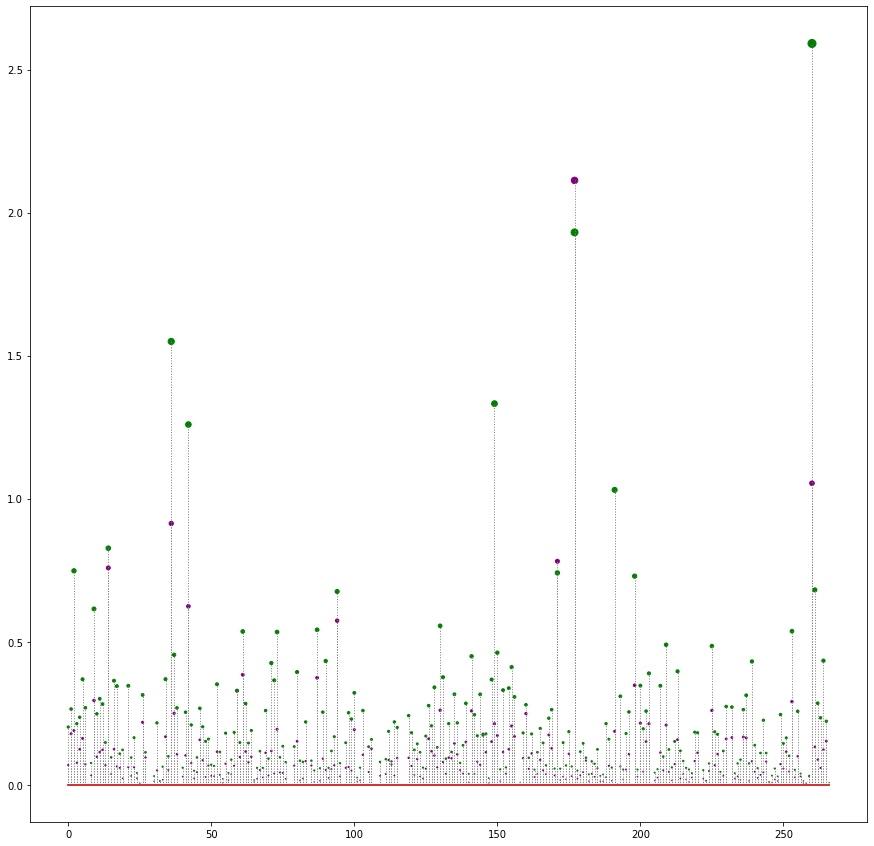

In [252]:
plt.figure(figsize = (15, 15))

mean_mean =  np.mean([mean_shap_1, 
                    mean_shap, 
                    mean_shap_2, 
                    mean_shap_3, 
                    mean_shap_4], axis=0)

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap))
                                  , mean_mean 
                                  , linefmt=':', markerfmt=' ')
plt.setp(stemlines, color='gray', linewidth=1, zorder=2)
plt.scatter(np.arange(0, len(max_shap)), mean_mean, s=mean_mean * 20, color='purple', zorder=1)



mean_max = np.mean([max_shap_1, 
                max_shap, 
                max_shap_2, 
                max_shap_3, 
                max_shap_4], axis=0)

_, stemlines, baseline = plt.stem(np.arange(0, len(max_shap))
                                  , mean_max / 5
                                  , linefmt=':', markerfmt=' ')
plt.setp(stemlines, color='gray', linewidth=1, zorder=2)
plt.scatter(np.arange(0, len(max_shap)), mean_max / 5, s=mean_max * 5, color='green', zorder=1)


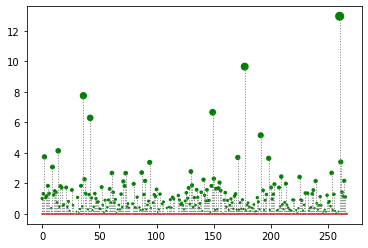

,NC_028351.1_4389407_C_T,NC_028351.1_10609109_T_C,NC_028351.1_27159258_A_G,NC_028352.1_4467878_A_G,NC_028352.1_10968089_C_G,NC_028352.1_11005246_G_A,NC_028352.1_21084823_T_C,NC_028353.1_9110081_A_C,NC_028353.1_10441671_G_A,NC_028354.1_19007443_T_C,...,NC_028359.1_1123957_C_T,NC_028359.1_2263073_T_C,NC_028359.1_7726115_T_A,NC_028359.1_11508209_C_T,NC_028361.1_6343387_T_C,NW_014541837.1_1074368_C_T,NW_014542552.1_437170_C_A,NW_014543262.1_740995_G_A,NW_014543262.1_1621171_G_T,NW_014543415.1_372624_C_T
0,1,2,2,0,1,1,1,1,1,2,...,2,1,2,2,2,2,2,2,2,1
1,0,2,2,2,2,2,2,2,0,2,...,2,0,2,2,2,2,2,2,2,2
2,0,0,0,2,2,2,2,0,2,0,...,2,2,2,0,0,0,0,0,0,2
3,2,2,0,0,0,0,0,2,0,2,...,2,0,2,2,2,2,2,2,2,1
4,0,2,2,2,2,2,2,2,0,2,...,2,0,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0,1,0,2,2,2,2,0,1,1,...,2,2,2,1,1,1,0,0,0,2
1297,1,2,2,1,1,2,0,1,0,2,...,1,1,2,2,2,2,2,2,2,1
1298,0,0,2,2,1,1,2,2,0,2,...,0,2,2,2,0,0,2,0,0,2
1299,0,2,0,2,2,2,1,2,2,2,...,0,0,2,2,0,2,2,2,2,1


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


In [296]:
booster_params = {
    # general parameters
    "booster" : "gbtree",
    "verbosity" : 1,
    # "num_feature" 
    # tree booster parameters
    "eta" : 0.3, # learning rate
    "gamma" : 0.001, # min split loss  
    #Minimum loss reduction required to make a further 
    #partition on a leaf node of the tree. The larger gamma is, 
    #the more conservative the algorithm will be.
    
    "max_depth" : 7,
    "min_child_weight" : 1,
    
    #Minimum sum of instance weight (hessian) needed in a child. 
    #If the tree partition step results in a leaf node with the 
    #sum of instance weight less than min_child_weight, 
    #then the building process will give up further partitioning. 
    #In linear regression task, this simply corresponds to minimum 
    #number of instances needed to be in each node.
    #The larger min_child_weight is, the more conservative the algorithm will be.
    
    #"max_delta_step" : 0,
    
    "subsample" : 1,
    
    #Subsample ratio of the training instances. Setting it to 0.5 
    #means that XGBoost would randomly sample half of the training 
    #data prior to growing trees. and this will prevent overfitting. 
    #Subsampling will occur once in every boosting iteration
    
    #sampling_method [default= uniform]
    
    "colsample_bytree" : 1, 
    "colsample_bylevel" : 1, 
    "colsample_bynode" : 1,
    #"lambda" : 1, L2 regularization
    #"alpha" : 0, L1 regularization
    "grow_policy" : "lossguide",
    # max_leaves : 0,
    
    
}

In [297]:
#maxwell
I = []
E = []
S = []
P = []
N = []
R = []
for i in range(200):
    params = booster_params.copy()


    new_params = {
        "eta" : min(1, lognormal(mean=-3, sigma=1.5)),
        "max_depth" : int(max(3, normal(10, 5))),
        "min_child_weight" : int(max(1, normal(4, 3))),
    }

    num_boost_round=int(max(20, normal(200, 50)))
    params.update(new_params)

    boo = xgboost.train(
        params,
        xgboost.DMatrix(X_train, label=y_train),
        num_boost_round=num_boost_round,
        )

    importance_score = boo.get_score(importance_type='gain')
    
    #X100 = shap.utils.sample(X, 100) 
    #explainer = shap.Explainer(boo.predict, X100)
    #shap_values = explainer(X, max_evals=550)

    predict = boo.predict(xgboost.DMatrix(X_test))
    
    I.append(importance_score)
    E.append(mse(predict, y_test))
    R.append(np.corrcoef(predict, y_test)[0][1])
    P.append(new_params)
    N.append(num_boost_round)

[3691.682191456434,
 3141.4293495619477,
 3736.22815743256,
 3726.043534405628,
 3732.503942548678,
 2811.2374750107842,
 3693.693459040912,
 3707.6911547149803,
 4805.945199762413,
 2879.9402320904037,
 3139.8684720399433,
 3729.6489735348214,
 3544.6050077424366,
 3148.449263536736,
 3575.4721864653875,
 3439.2555559278794,
 2763.128474069771,
 3719.419936945544,
 3744.7542561191694,
 3729.880540189586,
 4328.312658996791,
 2933.6130780572325,
 3258.473876143562,
 3545.897821006049,
 3113.2422879889123,
 3728.8869892518683,
 3234.809612888345,
 3709.23773990504,
 3552.0422690704618,
 3733.432997401807,
 3704.2183688598284,
 3731.8003545249912,
 3228.3967049112484,
 3657.808348987944,
 3691.8276053503764,
 3548.8939749404885,
 2983.151658265465,
 3696.526686804354,
 3711.3755477426957,
 2545.9151904777214,
 3630.8878937907034,
 3145.6531074966533,
 3726.1853731529864,
 3736.8945906694535,
 3350.2836223135855,
 2976.476522275841,
 3594.854117385739,
 3639.466743093135,
 2931.1816063558

array([[ 1. , -0.5],
       [-0.5,  1. ]])

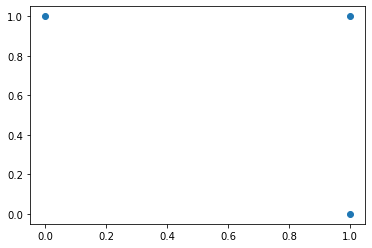

In [286]:
plt.scatter(np.array([1, 0, 1]), np.array([0, 1, 1]))
np.corrcoef(np.array([1, 0, 1]), np.array([0, 1, 1]))


In [282]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
r = np.corrcoef(x, y)
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [272]:
type(copyright)

_sitebuiltins._Printer

In [273]:
from _sitebuiltins import _Printer

In [274]:
fuck = _Printer('fuck', 'hello\n' * 10)

In [276]:
fuck()

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello

